In [1]:
path = '~/.kaggle/competitions/titanic/'

In [2]:
import pandas as pd
import numpy as np

In [3]:
data_train = pd.read_csv(path + "/train.csv")

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


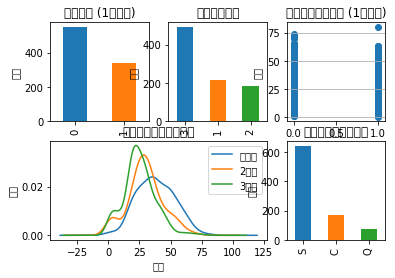

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')
# plots a bar graph of those who surived vs those who did not. 
plt.title(u"获救情况 (1为获救)") # puts a title on our graph
plt.ylabel(u"人数")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"按年龄看获救分布 (1为获救)")

plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()

<Figure size 432x288 with 0 Axes>

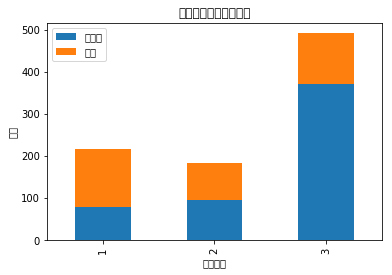

In [15]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 

plt.show()

<Figure size 432x288 with 0 Axes>

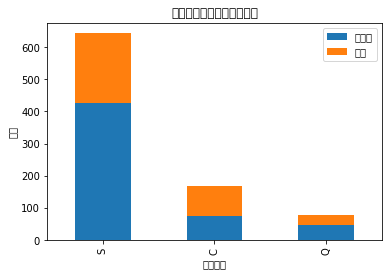

In [16]:
#看看各登录港口的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

<Figure size 432x288 with 0 Axes>

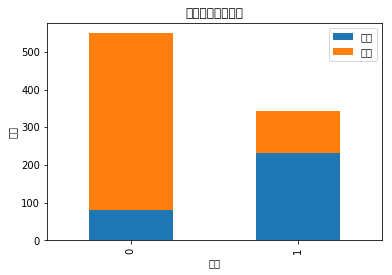

In [17]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

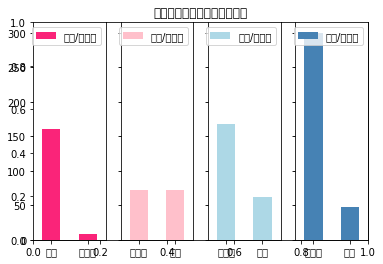

In [18]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

In [19]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [20]:
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [21]:
#ticket是船票编号，应该是unique的，和最后的结果没有太大的关系，不纳入考虑的特征范畴
#cabin只有204个乘客有值，我们先看看它的一个分布
data_train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
E101               3
D                  3
F33                3
F2                 3
E44                2
C78                2
C92                2
E25                2
C2                 2
B58 B60            2
E121               2
C126               2
C68                2
D26                2
F4                 2
B18                2
C125               2
E33                2
D17                2
B35                2
C65                2
B57 B59 B63 B66    2
D33                2
E8                 2
E24                2
D20                2
                  ..
B82 B84            1
C7                 1
A6                 1
D9                 1
A19                1
C82                1
B80                1
B42                1
B39                1
B102               1
B19                1
A31                1
D21                1
E49                1
A36                1
E36                1
D28          

<Figure size 432x288 with 0 Axes>

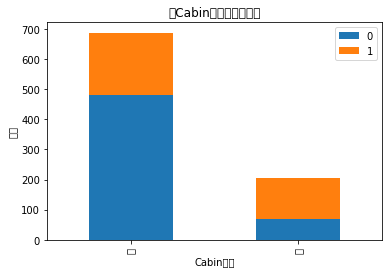

In [22]:
#cabin的值计数太分散了，绝大多数Cabin值只出现一次。感觉上作为类目，加入特征未必会有效
#那我们一起看看这个值的有无，对于survival的分布状况，影响如何吧
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

#似乎有cabin记录的乘客survival比例稍高，那先试试把这个值分为两类，有cabin值/无cabin值，一会儿加到类别特征好了

In [23]:
from sklearn.ensemble import RandomForestRegressor
 
### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [24]:
# 因为逻辑回归建模时，需要输入的特征都是数值型特征
# 我们先对类目型的特征离散/因子化
# 以Cabin为例，原本一个属性维度，因为其取值可以是['yes','no']，而将其平展开为'Cabin_yes','Cabin_no'两个属性
# 原本Cabin取值为yes的，在此处的'Cabin_yes'下取值为1，在'Cabin_no'下取值为0
# 原本Cabin取值为no的，在此处的'Cabin_yes'下取值为0，在'Cabin_no'下取值为1
# 我们使用pandas的get_dummies来完成这个工作，并拼接在原来的data_train之上，如下所示
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [27]:
# 接下来我们要接着做一些数据预处理的工作，比如scaling，将一些变化幅度较大的特征化到[-1,1]之内
# 这样可以加速logistic regression的收敛
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'], age_scale_param)
fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'], fare_scale_param)
df

ValueError: Expected 2D array, got 1D array instead:
array=[22.         38.         26.         35.         35.         23.83895259
 54.          2.         27.         14.          4.         58.
 20.         39.         14.         55.          2.         32.06649305
 31.         29.51820514 35.         34.         15.         28.
  8.         38.         29.51820514 19.         22.38011324 27.94720616
 40.         36.10804822 35.2958243  66.         28.         42.
 22.87630686 21.         18.         14.         40.         27.
 27.94720616  3.         19.         30.70572678 33.12898535 35.2958243
 23.45968333 18.          7.         21.         49.         29.
 65.         44.06483036 21.         28.5         5.         11.
 22.         38.         45.          4.         41.20008848 17.09991595
 29.         19.         17.         26.         32.         16.
 21.         26.         32.         25.         27.94720616 30.70572678
  0.83       30.         22.         29.         23.32262739 28.
 17.         33.         16.         30.70572678 23.         24.
 29.         20.         46.         26.         59.         30.70572678
 71.         23.         34.         34.         28.         27.94720616
 21.         33.         37.         28.         21.         27.51545426
 38.         33.55117591 47.         14.5        22.         20.
 17.         21.         70.5        29.         24.          2.
 21.         30.70572678 32.5        32.5        54.         12.
 35.2958243  24.         25.78337698 45.         33.         20.
 47.         29.         25.         23.         19.         37.
 16.         24.         25.34409583 22.         24.         19.
 18.         19.         27.          9.         36.5        42.
 51.         22.         55.5        40.5        29.78279613 51.
 16.         30.         25.52340334 10.86986696 44.         40.
 26.         17.          1.          9.         26.03188214 45.
 49.5542756  28.         61.          4.          1.         21.
 56.         18.          7.30954704 50.         30.         36.
 10.86986696 31.71894048  9.          1.          4.         46.24976824
 33.12898535 45.         40.         36.         32.         19.
 19.          3.         44.         58.         35.2958243  42.
 35.2958243  24.         28.         10.86986696 34.         45.5
 18.          2.         32.         26.         16.         40.
 24.         35.         22.         30.         31.09342985 31.
 27.         42.         32.         30.         16.         27.
 51.         27.94720616 38.         22.         19.         20.5
 18.          7.30954704 35.         29.         59.          5.
 24.         31.10838452 44.          8.         19.         33.
 20.80015413 33.12898535 29.         22.         30.         44.
 25.         24.         37.         54.         29.78279613 29.
 62.         30.         41.         29.         34.62028571 30.
 35.         50.         35.2958243   3.         52.         40.
 35.2958243  36.         16.         25.         58.         35.
 36.87489821 25.         41.         37.         35.2958243  63.
 45.         35.05181757  7.         35.         65.         28.
 16.         19.         57.74249226 33.         30.         22.
 42.         22.         26.         19.         36.         24.
 24.         41.20008848 23.5         2.         41.57487718 50.
 35.2958243  23.31368333 19.         42.57451554 30.70572678  0.92
 28.57888393 17.         30.         30.         24.         18.
 26.         28.         43.         26.         24.         54.
 31.         40.         22.         27.         30.         22.
 10.86986696 36.         61.         36.         31.         16.
 23.31368333 45.5        38.         16.         31.42587794 27.94720616
 29.         41.         45.         45.          2.         24.
 28.         25.         36.         24.         40.         26.68916849
  3.         42.         23.         59.96916448 15.         25.
 29.51820514 28.         22.         38.         22.38011324 22.38011324
 40.         29.         45.         35.         33.12898535 30.
 60.         22.87630686 35.2958243  24.         25.         18.
 19.         22.          3.         31.94479345 22.         27.
 20.         19.         42.          1.         32.         35.
 27.94720616 18.          1.         36.         19.89558113 17.
 36.         21.         28.         23.         24.         22.
 31.         46.         23.         28.         39.         26.
 21.         28.         20.         34.         51.          3.
 21.          7.30954704 27.94720616 20.68131488 33.         35.05181757
 44.         30.70572678 34.         18.         30.         10.
 27.94720616 21.         29.         28.         18.         29.78279613
 28.         19.         35.2958243  32.         28.         26.68916849
 42.         17.         50.         14.         21.         24.
 64.         31.         45.         20.         25.         28.
 23.47643239  4.         13.         34.          5.         52.
 36.         24.10899881 30.         49.         30.70572678 29.
 65.         44.06001827 50.         35.2958243  48.         34.
 47.         48.         30.70572678 38.         35.05181757 56.
 19.89558113  0.75       29.78279613 38.         33.         23.
 22.         44.65953056 34.         29.         22.          2.
  9.         35.05181757 50.         63.         25.          7.30954704
 35.         58.         30.          9.         24.10899881 21.
 55.         71.         21.         18.19479484 54.         25.7554753
 25.         24.         17.         21.         26.82073281 37.
 16.         18.         33.         49.8994093  28.         26.
 29.         30.70572678 36.         54.         24.         47.
 34.         34.17374861 36.         32.         30.         22.
 29.51820514 44.         22.87630686 40.5        50.         38.5155
 39.         23.          2.         22.87630686 17.          8.01370298
 30.          7.         45.         30.         24.33021696 22.
 36.          9.         11.         32.         50.         64.
 19.         32.79502428 33.          8.         17.         27.
 26.3814249  22.         22.         62.         48.         38.5155
 39.         36.         35.2958243  40.         28.         30.70572678
 30.70572678 24.         19.         29.         22.87630686 32.
 62.         53.         36.         35.2958243  16.         19.
 34.         39.         20.07016773 32.         25.         39.
 54.         36.         29.04293865 18.         47.         60.
 22.         30.70572678 35.         52.         47.         27.45639428
 37.         36.         24.40235514 49.         29.51820514 49.
 24.         27.94720616 37.51615833 44.         35.         36.
 30.         27.         22.         40.         39.         27.86873699
 33.12898535 35.2958243  35.         24.         34.         26.
  4.         26.         27.         42.         20.         21.
 21.         61.         57.         21.         26.         19.89558113
 80.         51.         32.         38.83477484  9.         28.
 32.         31.         41.         26.68916849 20.         24.
  2.         29.56889809  0.75       48.         19.         56.
 31.10838452 23.         27.94720616 18.         21.         26.3814249
 18.         24.         27.94720616 32.         23.         58.
 50.         40.         47.         36.         20.         32.
 25.         27.51545426 43.         39.08817814 40.         31.
 70.         31.         35.05181757 18.         24.5        18.
 43.         36.         23.47643239 27.         20.         14.
 60.         25.         14.         19.         18.         15.
 31.          4.         29.56889809 25.         60.         52.
 44.         19.89558113 49.         42.         18.         35.
 18.         25.         26.         39.         45.         42.
 22.         17.09991595 24.         49.8994093  48.         29.
 52.         19.         38.         27.         27.30887391 33.
  6.         17.         34.         50.         27.         20.
 30.         19.89558113 25.         25.         29.         11.
 35.05181757 23.         23.         28.5        48.         35.
 27.94720616 27.94720616 38.42663175 36.         21.         24.
 31.         70.         16.         30.         19.         31.
  4.          6.         33.         23.         48.          0.67
 28.         18.         34.         33.         24.33021696 41.
 20.         36.         16.         51.         39.17490238 30.5
 33.55117591 32.         24.         48.         57.         29.51820514
 54.         18.         35.2958243   5.         19.89558113 43.
 13.         17.         29.         16.1939502  25.         25.
 18.          8.          1.         46.         35.2958243  16.
 10.86986696 50.38328427 25.         39.         49.         31.
 30.         30.         34.         31.         11.          0.42
 27.         31.         39.         18.         39.         33.
 26.         39.         35.          6.         30.5        38.83477484
 23.         31.         43.         10.         52.         27.
 38.         27.          2.         35.09787898 29.56889809  1.
 35.2958243  62.         15.          0.83       22.87630686 23.
 18.         39.         21.         30.70572678 32.         50.91095013
 20.         16.         30.         34.5        17.         42.
 10.86986696 35.         28.         43.96476448  4.         74.
  9.         16.         44.         18.         45.         51.
 24.         22.87630686 41.         21.         48.         10.86986696
 24.         42.         27.         31.         25.97788916  4.
 26.         47.         33.         47.         28.         15.
 20.         19.         27.94720616 56.         25.         33.
 22.         28.         25.         39.         27.         19.
 16.1939502  26.         32.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [28]:
# 我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
    
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [29]:
X.shape

(891, 12)